<a href="https://colab.research.google.com/github/ZayDest/Agrex.AI/blob/main/Agrex_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread("/content/Transistor.jpeg")
  
# fetching the dimensions
wid = img.shape[1]
hgt = img.shape[0]
  
# displaying the dimensions
print(str(wid) + "x" + str(hgt))

755x1599


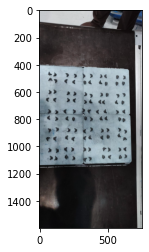

In [2]:
import matplotlib.pyplot as plt
# call imshow() using plt object
plt.imshow(img)
# display that image
plt.show()

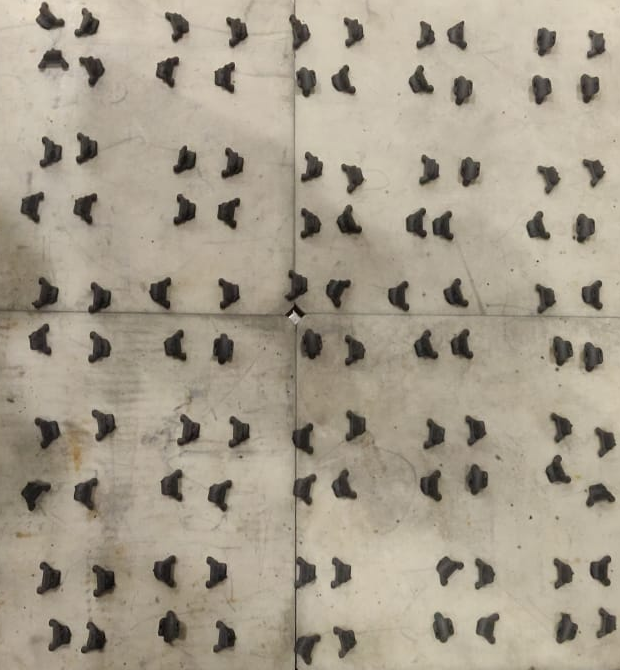

In [3]:
#Cropping and viewing image to get required image for processing 
img=img[450:1120, 30:650]
cv2_imshow(img)

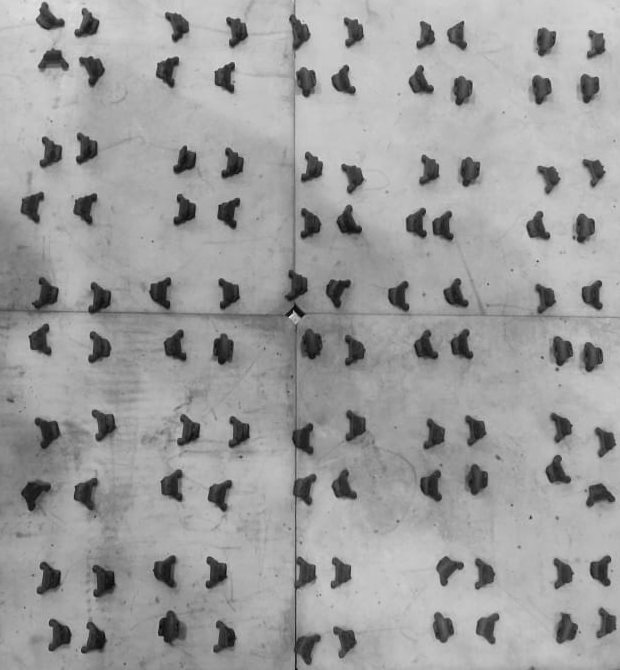

In [4]:
# Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_img)

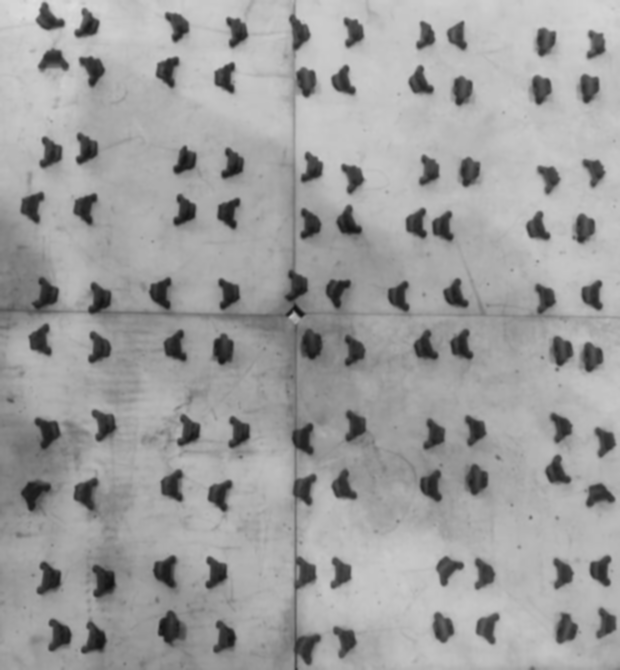

In [5]:
# Applying Gaussian blur to reduce noise
blurred_img = cv2.GaussianBlur(gray_img, (5, 5), 0)
cv2_imshow(blurred_img)

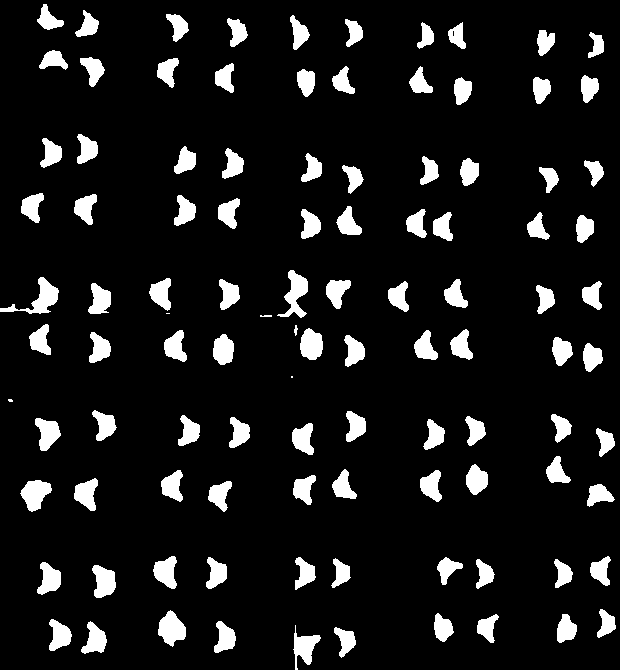

In [6]:
# Thresholding the image to create a binary image with 100 thrshold
ret, thresh_img = cv2.threshold(blurred_img, 100, 255, cv2.THRESH_BINARY_INV)
cv2_imshow(thresh_img)

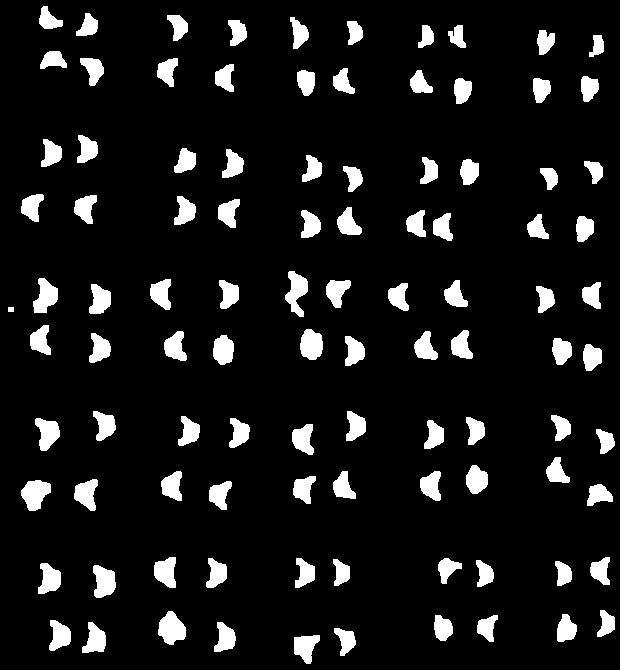

In [7]:
# Using morphological operations to remove small white noise
kernel = np.ones((3,3),np.uint8)
morph_img = cv2.morphologyEx(thresh_img, cv2.MORPH_OPEN, kernel, iterations = 2)
cv2_imshow(morph_img)

In [8]:
# Finding contours in the binary image
contours, _ = cv2.findContours(morph_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(contours)

(array([[[313, 635]],

       [[312, 636]],

       [[301, 636]],

       [[300, 637]],

       [[294, 637]],

       [[294, 653]],

       [[295, 654]],

       [[299, 654]],

       [[302, 657]],

       [[302, 658]],

       [[304, 660]],

       [[304, 661]],

       [[306, 663]],

       [[310, 663]],

       [[310, 662]],

       [[311, 661]],

       [[311, 656]],

       [[310, 655]],

       [[311, 654]],

       [[311, 651]],

       [[312, 650]],

       [[312, 649]],

       [[313, 648]],

       [[313, 646]],

       [[314, 645]],

       [[314, 644]],

       [[316, 642]],

       [[317, 642]],

       [[319, 640]],

       [[319, 635]]], dtype=int32), array([[[334, 628]],

       [[334, 632]],

       [[336, 634]],

       [[337, 634]],

       [[339, 636]],

       [[339, 637]],

       [[340, 638]],

       [[340, 640]],

       [[341, 641]],

       [[341, 645]],

       [[342, 646]],

       [[342, 648]],

       [[341, 649]],

       [[341, 650]],

       [[340, 651

In [14]:
# Looping over all contours and drawing rectangles around each transistor
Number_of_Transistor_Detected=0
for contour in contours:
    # Skip contours that are too small
    if cv2.contourArea(contour) < 100:
        continue
    Number_of_Transistor_Detected+=1
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
print("Total Number Transistor detected in an Image :",flag)

Total Number Transistor detected in an Image : 100


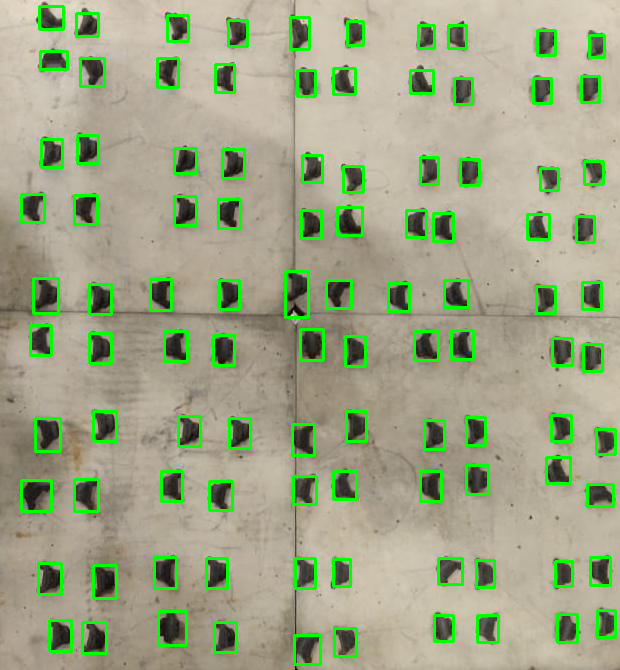

In [15]:
# Displaying the image with rectangles around each transistor
cv2_imshow(img)